## Plotting data temperature in a chart

https://gis.ncdc.noaa.gov/maps/ncei/summaries/daily


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

In [2]:
madrid = pd.read_csv("madrid_weather_20200401T072911.csv")

In [3]:
madrid.head(365)

,timestamp,temperature_celsius,precipitation_mm,wind_speed_km_h
0,20200318T0000,11.643209,0.0,14.338656
1,20200318T0100,11.103209,0.0,13.583788
2,20200318T0200,10.833208,0.0,13.191508
3,20200318T0300,10.313209,0.0,13.207638
4,20200318T0400,9.713208,0.0,12.859147
...,...,...,...,...
355,20200401T1900,12.813209,0.0,5.172553
356,20200401T2000,12.263208,0.0,5.644915
357,20200401T2100,11.643209,0.0,6.074854
358,20200401T2200,10.603209,0.0,6.665326


- Calcalute temp max, min & avg per each day
- plot as line graph
- plot precipation as bar graph

In [4]:
# transform timestamp in a more suitable  format
pd.to_datetime(madrid["timestamp"], format="%Y-%m-%d %H:%M")

0     2020-03-18 00:00:00
1     2020-03-18 01:00:00
2     2020-03-18 02:00:00
3     2020-03-18 03:00:00
4     2020-03-18 04:00:00
              ...        
355   2020-04-01 19:00:00
356   2020-04-01 20:00:00
357   2020-04-01 21:00:00
358   2020-04-01 22:00:00
359   2020-04-01 23:00:00
Name: timestamp, Length: 360, dtype: datetime64[ns]

In [5]:
# we add 3 columns: datetime, date and time
madrid = madrid.assign(datetime = pd.to_datetime(madrid["timestamp"]),
                           date = pd.to_datetime(madrid["timestamp"]).dt.date,
                           time = pd.to_datetime(madrid["timestamp"]).dt.time)

madrid

,timestamp,temperature_celsius,precipitation_mm,wind_speed_km_h,datetime,date,time
0,20200318T0000,11.643209,0.0,14.338656,2020-03-18 00:00:00,2020-03-18,00:00:00
1,20200318T0100,11.103209,0.0,13.583788,2020-03-18 01:00:00,2020-03-18,01:00:00
2,20200318T0200,10.833208,0.0,13.191508,2020-03-18 02:00:00,2020-03-18,02:00:00
3,20200318T0300,10.313209,0.0,13.207638,2020-03-18 03:00:00,2020-03-18,03:00:00
4,20200318T0400,9.713208,0.0,12.859147,2020-03-18 04:00:00,2020-03-18,04:00:00
...,...,...,...,...,...,...,...
355,20200401T1900,12.813209,0.0,5.172553,2020-04-01 19:00:00,2020-04-01,19:00:00
356,20200401T2000,12.263208,0.0,5.644915,2020-04-01 20:00:00,2020-04-01,20:00:00
357,20200401T2100,11.643209,0.0,6.074854,2020-04-01 21:00:00,2020-04-01,21:00:00
358,20200401T2200,10.603209,0.0,6.665326,2020-04-01 22:00:00,2020-04-01,22:00:00


In [6]:
# rename and drop columns
madrid = (madrid.rename(columns={"temperature_celsius":"temp", "precipitation_mm":"prep", "wind_speed_km_h":"windspeed"})
                .drop(columns=["timestamp"]))

madrid

,temp,prep,windspeed,datetime,date,time
0,11.643209,0.0,14.338656,2020-03-18 00:00:00,2020-03-18,00:00:00
1,11.103209,0.0,13.583788,2020-03-18 01:00:00,2020-03-18,01:00:00
2,10.833208,0.0,13.191508,2020-03-18 02:00:00,2020-03-18,02:00:00
3,10.313209,0.0,13.207638,2020-03-18 03:00:00,2020-03-18,03:00:00
4,9.713208,0.0,12.859147,2020-03-18 04:00:00,2020-03-18,04:00:00
...,...,...,...,...,...,...
355,12.813209,0.0,5.172553,2020-04-01 19:00:00,2020-04-01,19:00:00
356,12.263208,0.0,5.644915,2020-04-01 20:00:00,2020-04-01,20:00:00
357,11.643209,0.0,6.074854,2020-04-01 21:00:00,2020-04-01,21:00:00
358,10.603209,0.0,6.665326,2020-04-01 22:00:00,2020-04-01,22:00:00


In [7]:
# round the temperature
madrid["temp"] = round(madrid["temp"])
madrid

,temp,prep,windspeed,datetime,date,time
0,12.0,0.0,14.338656,2020-03-18 00:00:00,2020-03-18,00:00:00
1,11.0,0.0,13.583788,2020-03-18 01:00:00,2020-03-18,01:00:00
2,11.0,0.0,13.191508,2020-03-18 02:00:00,2020-03-18,02:00:00
3,10.0,0.0,13.207638,2020-03-18 03:00:00,2020-03-18,03:00:00
4,10.0,0.0,12.859147,2020-03-18 04:00:00,2020-03-18,04:00:00
...,...,...,...,...,...,...
355,13.0,0.0,5.172553,2020-04-01 19:00:00,2020-04-01,19:00:00
356,12.0,0.0,5.644915,2020-04-01 20:00:00,2020-04-01,20:00:00
357,12.0,0.0,6.074854,2020-04-01 21:00:00,2020-04-01,21:00:00
358,11.0,0.0,6.665326,2020-04-01 22:00:00,2020-04-01,22:00:00


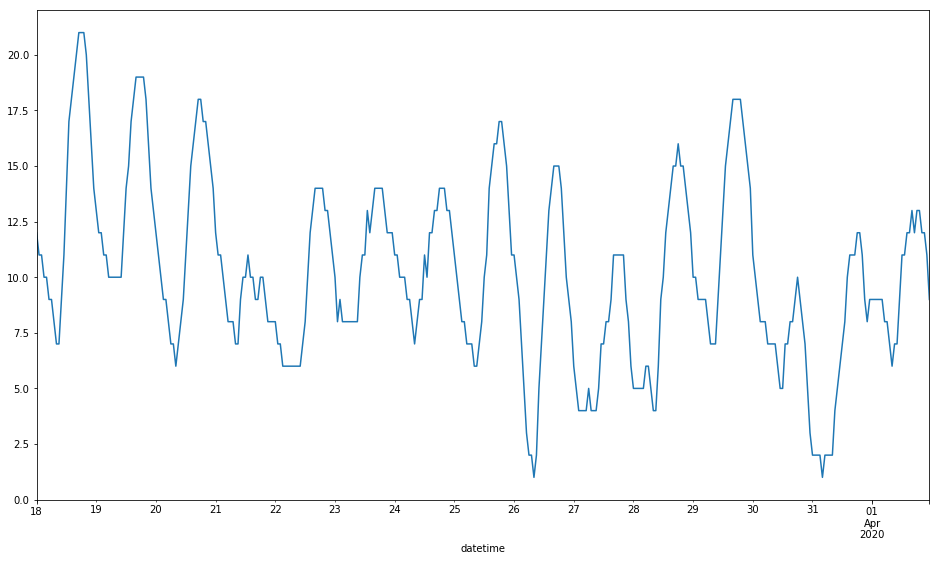

In [8]:
# set a series madrid_hourly & plot
madrid_hourly = madrid.set_index("datetime")["temp"]

fig, ax = plt.subplots(figsize =(16,9))
ax = madrid_hourly.plot.line();

In [9]:
# generate new dataframe with the needed values

madrid_daily_t =((madrid.groupby(["date"])[["temp"]]      # group by date to have temperature single daily value
                        .agg([np.mean, np.max, np.min]))  # get the aggregated mean, max, min
                        ["temp"]                          # remove unconfortable double column names
                        .rename(columns={"mean":"avg_t",  # rename columns names
                                         "amax":"max_t",
                                         "amin":"min_t"})
                        .round(1)                         # round every value with only one decimal
                        .rename_axis(None))               # remove the index name

madrid_daily_t

,avg_t,max_t,min_t
2020-03-18,13.9,21.0,7.0
2020-03-19,13.8,19.0,10.0
2020-03-20,12.1,18.0,6.0
2020-03-21,9.2,12.0,7.0
2020-03-22,9.4,14.0,6.0
2020-03-23,10.8,14.0,8.0
2020-03-24,10.9,14.0,7.0
2020-03-25,11.0,17.0,6.0
2020-03-26,8.7,15.0,1.0
2020-03-27,6.9,11.0,4.0


''

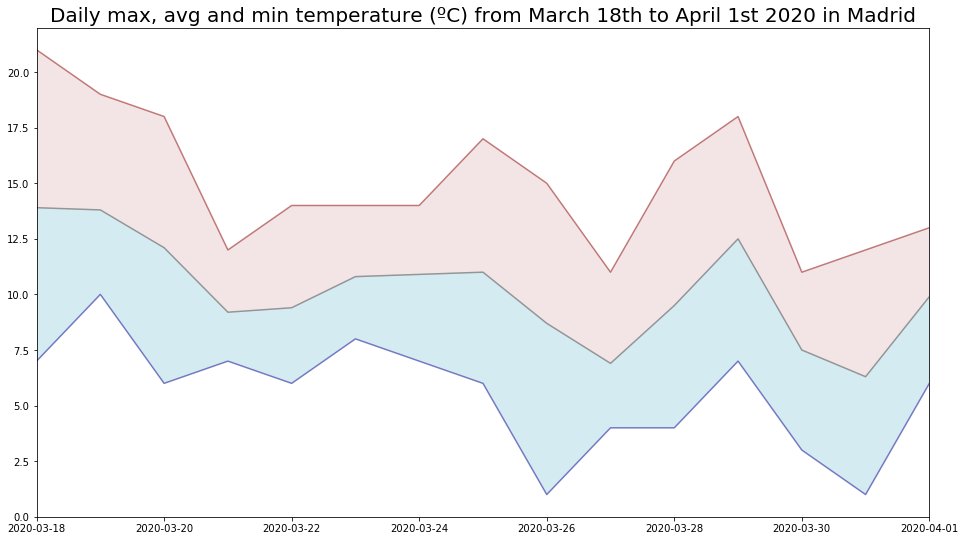

In [10]:

fig, ax = plt.subplots(figsize=(16,9))
ax = madrid_daily_t["avg_t"].plot.line(c="grey", alpha=0.8)
ax = madrid_daily_t["max_t"].plot.line(c="darkred", alpha=0.5)
ax = madrid_daily_t["min_t"].plot.line(c="darkblue", alpha=0.5)
plt.fill_between(madrid_daily_t.index,
                 madrid_daily_t["max_t"],
                 madrid_daily_t["avg_t"],
                 facecolor = "darkred",
                 alpha = 0.1)
plt.fill_between(madrid_daily_t.index,
                 madrid_daily_t["avg_t"],
                 madrid_daily_t["min_t"],
                 facecolor = "lightblue",
                 alpha = 0.5)
plt.title("Daily max, avg and min temperature (ºC) from March 18th to April 1st 2020 in Madrid", fontsize = 20)
;

In [11]:
# create df with precipitations in Madrid
madrid_daily_p =((madrid.groupby(["date"])[["prep"]]  # group by date to have temperature single daily value
                        .agg([np.sum]))               # get the aggregated mean, max, min
                        ["prep"]                      # remove unconfortable double column names
                        .rename(columns={"sum":"mm"}) # rename columns names
                        .round(1)                     # round every value with only one decimal
                        .rename_axis(None))           # remove the index name

madrid_daily_p

,mm
2020-03-18,0.0
2020-03-19,0.0
2020-03-20,0.0
2020-03-21,2.2
2020-03-22,0.8
2020-03-23,0.4
2020-03-24,0.5
2020-03-25,0.0
2020-03-26,0.0
2020-03-27,0.0


''

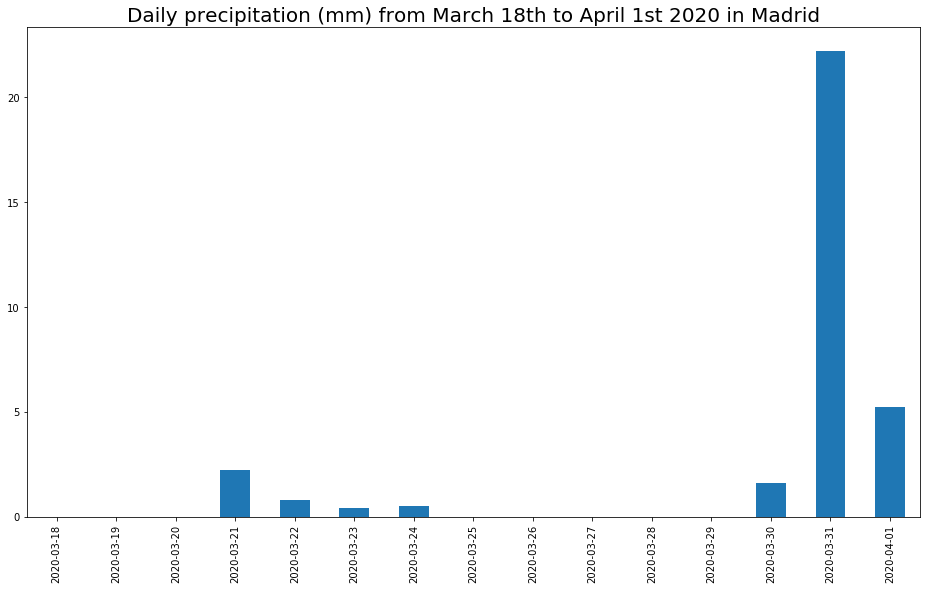

In [12]:
fig, ax = plt.subplots(figsize=(16,9))
ax = madrid_daily_p["mm"].plot.bar()
plt.title("Daily precipitation (mm) from March 18th to April 1st 2020 in Madrid", fontsize = 20)
;

Check basic time series manipulation with pandas
https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea